# Inverted Pendulum

> An inverted pendulum is a pendulum that has its center of mass above its pivot point. It is unstable and without additional help will fall over. \[...\]  It is often implemented with the pivot point mounted on a cart that can move horizontally under control of an electronic servo system as shown in the photo; this is called a cart and pole apparatus.

[From Wikipedia](https://en.wikipedia.org/wiki/Inverted_pendulum)

## Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from math import sin, cos

## Functions

In [55]:
def invertedPendulum(t, x):
    # Same function is derived using the tensor of inertia
    dx = np.zeros((len(x)))
        
    pos = x[0]
    d_pos = x[1]
    theta = x[2]
    d_theta = x[3]
    
    A = np.array([[m_car + m_rod, l*m_rod*cos(theta)],[m_rod*l*cos(theta),m_rod*(l^2)]])
    b = np.array([[-(d_theta^2)*l*m_rod*sin(theta)],[m_rod*l*g*sin(theta)]])
    
    forces = np.array([[f],[0.0]])
    
    x_sol = np.matmul(np.linalg.inv(A),forces-b)
    
    dx[0]= d_pos
    dx[1] = x_sol[0]
    dx[2]= d_theta
    dx[3] = x_sol[1]
    
    return dx

In [37]:
def funcionMiriam(t, x):
    # Same function is derived using the tensor of inertia
    dx = np.zeros((len(x)))
        
    pos = x[0]
    d_pos = x[1]
    theta = x[2]
    d_theta = x[3]
    
    A = np.array([[m_car + m_rod, l*m_rod*cos(theta)],[m_rod*l*cos(theta),m_rod*(l^2)]])
    b = np.array([[-(d_theta^2)*l*m_rod*sin(theta)],[m_rod*l*g*sin(theta)+2*l*m_rod*d_pos*d_theta*sin(theta)]])
    
    forces = np.array([[f],[0.0]])
    
    var = forces-b
    
    x_sol = np.matmul(np.linalg.inv(A),var)
    
    dx[0]= d_pos
    dx[1] = x_sol[0]
    dx[2]= d_theta
    dx[3] = x_sol[1]
    
    return dx

## Initial Conditions

In [56]:
x0 = np.array([0,0.0,n(pi*3/4),0.0])
g = 9.81
l = 1
m_car = 1
m_rod = 1
k = 1
f = 0

## Solve the system numerically

In [57]:
tempSol = integrate.solve_ivp(invertedPendulum,[0,10],x0, max_step=0.05)
tempSol2 = integrate.solve_ivp(funcionMiriam,[0,10],x0, max_step=0.05)

## Plot your results

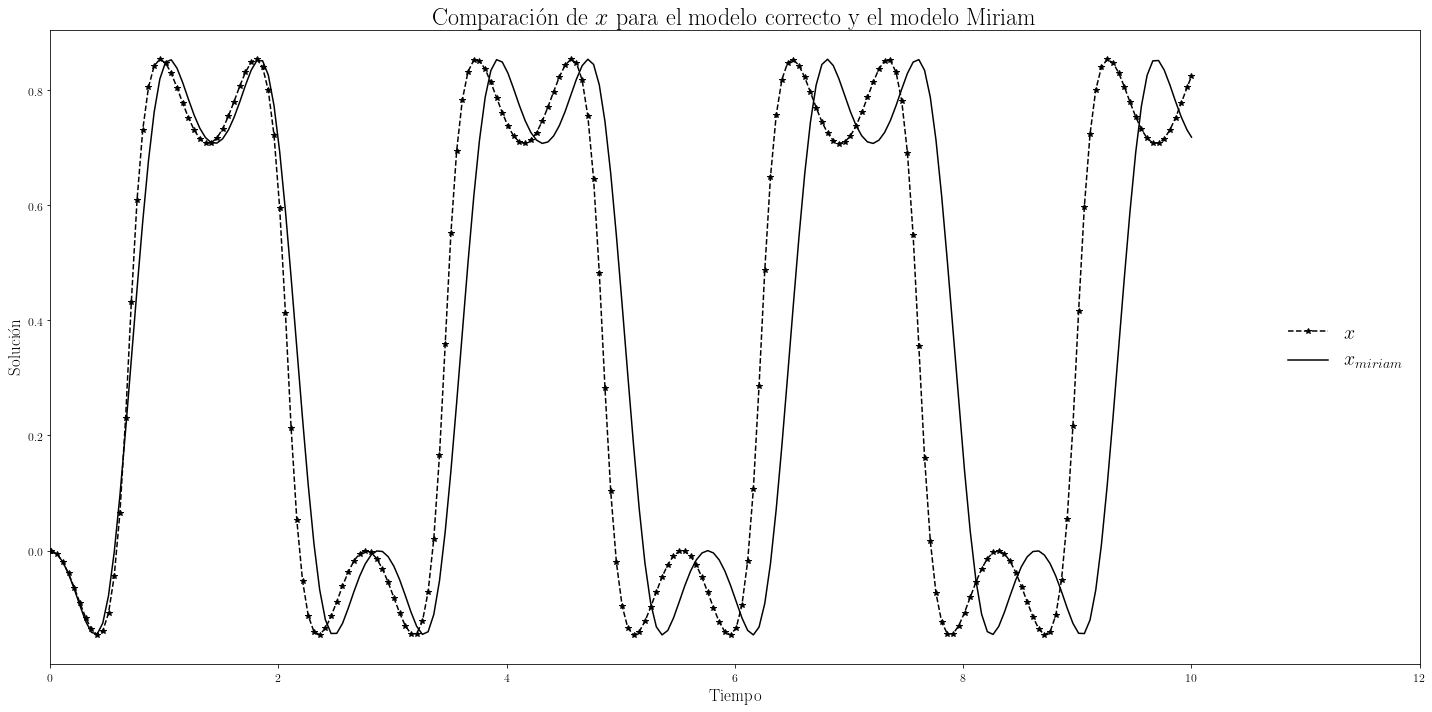

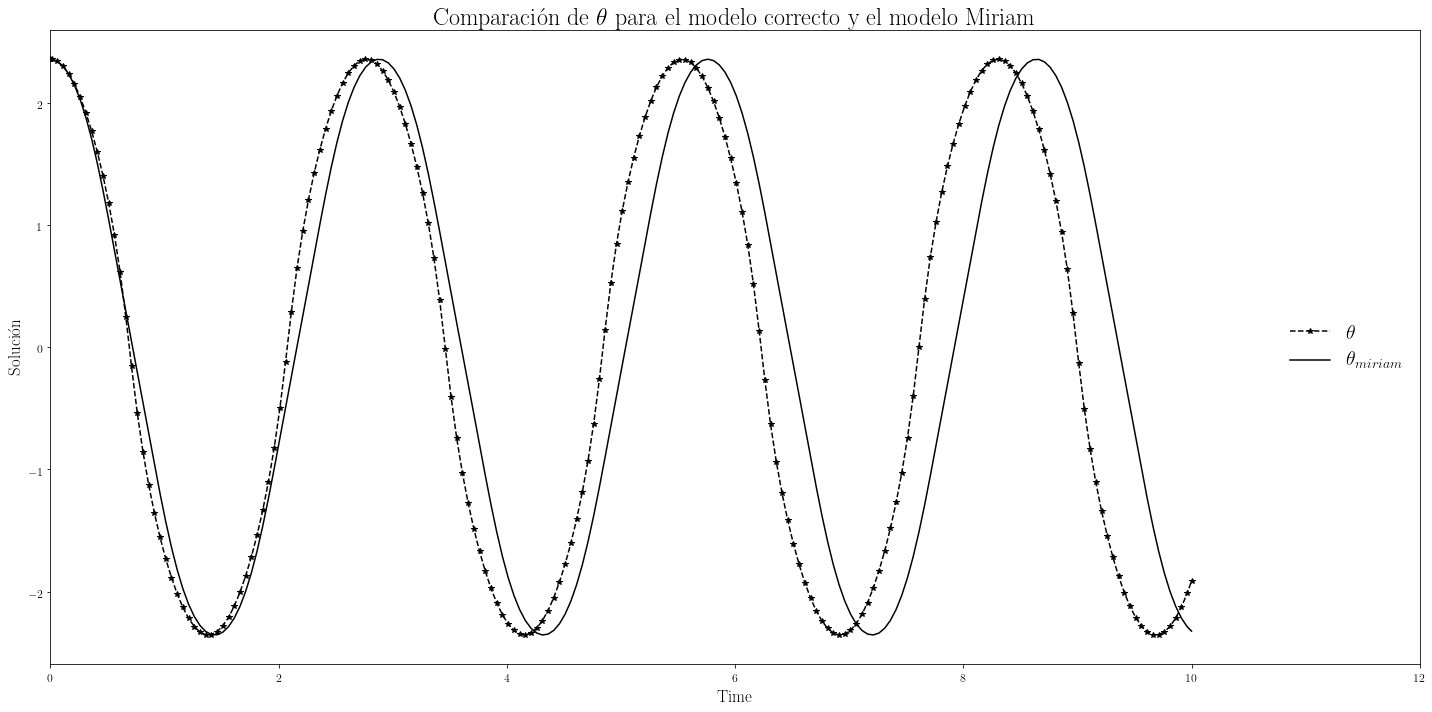

In [67]:
xs = np.transpose(tempSol.y)
ts = np.transpose(tempSol.t)

xsMiriam = np.transpose(tempSol2.y)
tsMiriam = np.transpose(tempSol2.t)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(num=1,figsize=(20,10))
plt.plot(ts, xs[:,0],"--*k",tsMiriam,xsMiriam[:,0],"k")
plt.xlim(0, 12)
plt.legend([u'$x$',u'$x_{miriam}$'], loc=5,fontsize=20,frameon=False)
plt.xlabel(u'Tiempo', fontsize=17)
plt.tick_params(labelsize='large')
plt.ylabel(u"Soluci\\'on", fontsize=17)
plt.title(u"Comparaci\\'on de $x$ para el modelo correcto y el modelo Miriam",fontsize=24)
plt.tight_layout()
    
    
plt.figure(num=2,figsize=(20,10))
plt.plot(ts, xs[:,2],"--*k",tsMiriam,xsMiriam[:,2],"k")
plt.xlim(0, 12)
plt.legend([u'$\\theta$',u'$\\theta_{miriam}$'], loc=5,fontsize=20,frameon=False)
plt.xlabel('Time', fontsize=17)
plt.tick_params(labelsize='large')
plt.ylabel(u"Soluci\\'on", fontsize=17)
plt.title(u"Comparaci\\'on de $\\theta$ para el modelo correcto y el modelo Miriam",fontsize=24)
plt.tight_layout()

### Simple Pendulum with friction